## Importing modules and packages

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA


## Import data and clean up data

In [2]:
train_data = pd.read_csv("./train.csv")


test_data = pd.read_csv("./test.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Splitting the passenger id into two parts, the group id and the number assigned in the group. In addition, split the cabin column into three, the deck, deck number, and which side of the deck.

In [3]:
Seperate_Passenger_ID = test_data["PassengerId"].str.split("_", n=1, expand=True)
test_data["PassengerGroup"]=Seperate_Passenger_ID[0]
test_data["PassengerNumber"]=Seperate_Passenger_ID[1]
test_data.drop(columns=["PassengerId"], inplace=True)

Seperate_Cabin=test_data["Cabin"].str.split("/", n=2, expand=True)
test_data["Deck"]=Seperate_Cabin[0]
test_data["DeckNumber"]=Seperate_Cabin[1]
test_data["DeckSide"]=Seperate_Cabin[2]
test_data.drop(columns=["Cabin"], inplace=True)

Seperate_Passenger_ID = train_data["PassengerId"].str.split("_", n=1, expand=True)
train_data["PassengerGroup"]=Seperate_Passenger_ID[0]
train_data["PassengerNumber"]=Seperate_Passenger_ID[1]
train_data.drop(columns=["PassengerId"], inplace=True)

Seperate_Cabin=train_data["Cabin"].str.split("/", n=2, expand=True)
train_data["Deck"]=Seperate_Cabin[0]
train_data["DeckNumber"]=Seperate_Cabin[1]
train_data["DeckSide"]=Seperate_Cabin[2]
train_data.drop(columns=["Cabin"], inplace=True)

train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)

Making all strings into numerical or categorial data

In [4]:
train_data['DeckNumber'] = train_data['DeckNumber'].astype('Int64')
train_data['PassengerGroup'] = train_data['PassengerGroup'].astype('Int64')
train_data['PassengerNumber'] = train_data['PassengerNumber'].astype('Int64')
# train_data['CryoSleep'] = train_data['CryoSleep'].map({'True': True, 'False': False})
train_data['HomePlanet'] = train_data['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2})
train_data['Destination'] = train_data['Destination'].map({'55 Cancri e': 0, 'PSO J318.5-22': 1,'TRAPPIST-1e': 2})
train_data['Deck'] = train_data['Deck'].map({'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9,'K': 10,'L': 11,'M': 12,'N': 13,'O': 14,'P': 15,'Q': 16,'R': 17,'S': 18,'T': 19,'U': 20,'V': 21,'W': 22,'X': 23,'Y': 24,'Z': 25})
train_data['DeckSide']=train_data['DeckSide'].map({'S': 0, 'P': 1})

test_data['DeckNumber'] = test_data['DeckNumber'].astype('Int64')
test_data['PassengerGroup'] = test_data['PassengerGroup'].astype('Int64')
test_data['PassengerNumber'] = test_data['PassengerNumber'].astype('Int64')
# test_data['CryoSleep'] = test_data['CryoSleep'].map({'True': True, 'False': False})
test_data['HomePlanet'] = test_data['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2})
test_data['Destination'] = test_data['Destination'].map({'55 Cancri e': 0, 'PSO J318.5-22': 1,'TRAPPIST-1e': 2})
test_data['Deck'] = test_data['Deck'].map({'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9,'K': 10,'L': 11,'M': 12,'N': 13,'O': 14,'P': 15,'Q': 16,'R': 17,'S': 18,'T': 19,'U': 20,'V': 21,'W': 22,'X': 23,'Y': 24,'Z': 25})
test_data['DeckSide']=test_data['DeckSide'].map({'S': 0, 'P': 1})


In [5]:
print(train_data.dtypes)

HomePlanet         float64
CryoSleep           object
Destination        float64
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Transported           bool
PassengerGroup       Int64
PassengerNumber      Int64
Deck               float64
DeckNumber           Int64
DeckSide           float64
dtype: object


In [49]:
train_data.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
PassengerGroup     0
PassengerNumber    0
Deck               0
DeckNumber         0
DeckSide           0
dtype: int64

In [51]:
test_data.isna().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
PassengerGroup     0
PassengerNumber    0
Deck               0
DeckNumber         0
DeckSide           0
dtype: int64

We will fill in missing data one by one. For now, we will be using the mean/median/mode.

For Home Planet, Cryosleep, Destination, VIP, Deck, DeckNumber and DeckSide, we will be using the mode.
For the rest, we will be using the median.


In [42]:
train_data_mode=train_data.mode()

train_data["HomePlanet"].fillna(train_data_mode['HomePlanet'][0], inplace = True)
train_data["CryoSleep"].fillna(train_data_mode['CryoSleep'][0], inplace = True)
train_data["Destination"].fillna(train_data_mode['Destination'][0], inplace = True)
train_data["VIP"].fillna(train_data_mode['VIP'][0], inplace = True)
train_data["Deck"].fillna(train_data_mode['Deck'][0], inplace = True)
train_data["DeckNumber"].fillna(train_data_mode['DeckNumber'][0], inplace = True)
train_data["DeckSide"].fillna(train_data_mode['DeckSide'][0], inplace = True)

test_data_mode=test_data.mode()

test_data["HomePlanet"].fillna(test_data_mode['HomePlanet'][0], inplace = True)
test_data["CryoSleep"].fillna(test_data_mode['CryoSleep'][0], inplace = True)
test_data["Destination"].fillna(test_data_mode['Destination'][0], inplace = True)
test_data["VIP"].fillna(test_data_mode['VIP'][0], inplace = True)
test_data["Deck"].fillna(test_data_mode['Deck'][0], inplace = True)
test_data["DeckNumber"].fillna(test_data_mode['DeckNumber'][0], inplace = True)
test_data["DeckSide"].fillna(test_data_mode['DeckSide'][0], inplace = True)

C:\Users\alexy\AppData\Local\Temp\ipykernel_19500\3438082747.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["HomePlanet"].fillna(train_data_mode['HomePlanet'][0], inplace = True)
C:\Users\alexy\AppData\Local\Temp\ipykernel_19500\3438082747.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [50]:
train_data_mean=train_data.mean()

train_data["Age"].fillna(train_data_mean['Age'], inplace = True)
train_data["RoomService"].fillna(train_data_mean['RoomService'], inplace = True)
train_data["FoodCourt"].fillna(train_data_mean['FoodCourt'], inplace = True)
train_data["ShoppingMall"].fillna(train_data_mean['ShoppingMall'], inplace = True)
train_data["Spa"].fillna(train_data_mean['Spa'], inplace = True)
train_data["VRDeck"].fillna(train_data_mean['VRDeck'], inplace = True)

test_data_mean=test_data.mean()

test_data["Age"].fillna(test_data_mean['Age'], inplace = True)
test_data["RoomService"].fillna(test_data_mean['RoomService'], inplace = True)
test_data["FoodCourt"].fillna(test_data_mean['FoodCourt'], inplace = True)
test_data["ShoppingMall"].fillna(test_data_mean['ShoppingMall'], inplace = True)
test_data["Spa"].fillna(test_data_mean['Spa'], inplace = True)
test_data["VRDeck"].fillna(test_data_mean['VRDeck'], inplace = True)


C:\Users\alexy\AppData\Local\Temp\ipykernel_19500\2975137249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data_mean['Age'], inplace = True)
C:\Users\alexy\AppData\Local\Temp\ipykernel_19500\2975137249.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [53]:
train_transported=train_data[train_data['Transported']==True]
train_not_transported=train_data[train_data['Transported']==False]

train_not_transported_downsampled=resample(train_not_transported,replace=False,n_samples=1000)
train_transported_downsampled=resample(train_transported,replace=False,n_samples=1000)

train_downsampled=pd.concat([train_transported_downsampled,train_not_transported_downsampled])

## Setting independant and dependant variables

In [54]:
X=train_data.drop('Transported',axis=1).copy()
y=train_data['Transported'].copy()

X_dummies=pd.get_dummies(X,columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'PassengerGroup', 'PassengerNumber', 'Deck', 'DeckNumber', 'DeckSide'])


The Radial Basis Function only works when the data is centered and scaled, so that the mean value is 0 and the standard deviation is 1.

In [55]:
X_train,X_test, y_train, y_test=train_test_split(X_dummies,y)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [56]:
test_svm=SVC()
test_svm.fit(X_train_scaled,y_train)


SVC()

In [58]:
a=test_svm.predict(X_test)

c:\Users\alexy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [59]:
a

array([False, False, False, ..., False,  True, False])

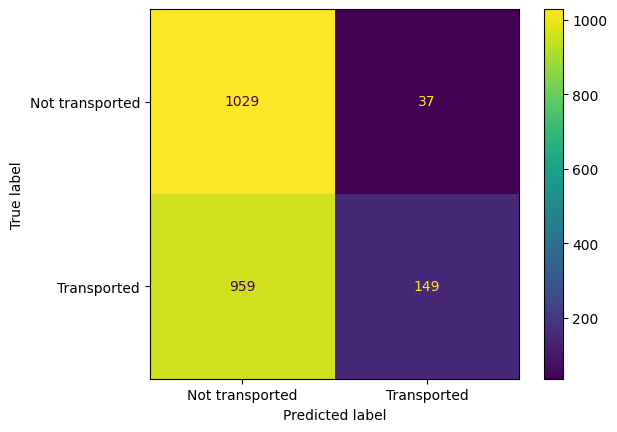

In [61]:
confusionMatrix=confusion_matrix(y_test,a,labels=[False,True])
disp=ConfusionMatrixDisplay(confusion_matrix=confusionMatrix,display_labels=["Not transported","Transported"])
disp.plot()

Since our model has a total of a 54% accuracy rate, which isn't great, we will use cross validation to find better parameters.